<h2 style="text-align:center;color:#05368B;font-size: 107px; ">EDA </h2>
 <h2 style="text-align:center;color:#05368B;font-size: 47px; "> Exploratory Data Analysis:The Rise of <b>Netflix</h2>

#   Table of content
* [0.) Introduction](#0)
* [0.1) Netflix Timeline](#0.1)
* [Phase 1:Data Preprocessing](#1)
    - [1.1) Importing necessary library](#1.1)
    - [1.2) First look at data](#1.2)
    - [1.3) Number of unique vlaues of each column](#1.3)
    - [1.4) Missing values in data](#1.4)
    - [1.5) Filling missing values](#1.5)
    - [1.6) Creating new column called year added , month added
](#1.6)
* [Phase 2:Data Visualization](#2)
    - [2.1) Netflix Content : Movies vs TV shows](#2.1)
    - [2.2) Yearwise Analysis](#2.2)
    - [2.3) Monthwise Analysis](#2.3)
    - [2.4) Duration Analysis](#2.4)
    - [2.5) Genres Analysis](#2.5)
    - [2.6) Title and Description Analysis](#2.6)
    - [2.7) Directors Analysis](#2.7)
    - [2.8) Rating Analysis](#2.8)
    - [2.9) Countrywise analysis](#2.9)


  <h2 style="text-align:left;color:darkblue;font-size: 27px; "> 0. Introduction</h2>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#05368B;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Netflix is one of the world's leading entertainment services with 222 million paid memberships in over 190 countries enjoying TV series, documentaries, feature films and mobile games across a wide variety of genres and languages. Members can watch as much as they want, anytime, anywhere, on any internet-connected screen. Members can play, pause and resume watching, all without commercials or commitments.
    
</p>
</div>


<a id="0"></a>

<h2 style="text-align:left;color:darkblue;font-size: 27px; ">0.1) Netflix timeline</h2>
<a id="0.1"></a>

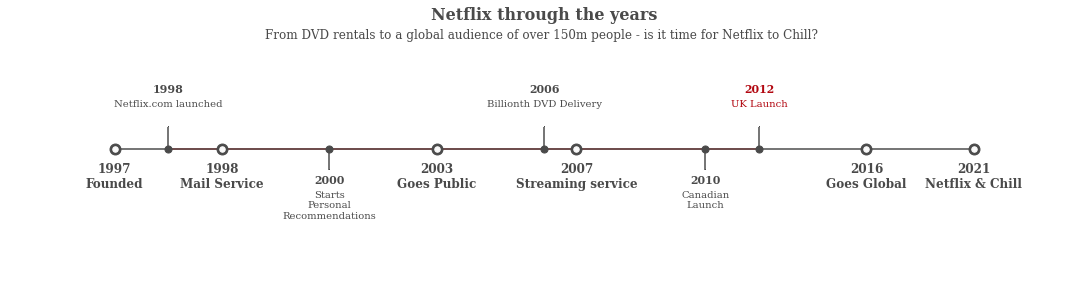

In [1]:
# Timeline code from Subin An's awesome notebook
# https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset


from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
## these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8,9]

## these go on the numbers
tl_sub_x = [1.5,3,5,6.5,7]


tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch"]



# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)


# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')



# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()

<h2 style="text-align: left;color:darkblue;font-size: 35px; ">Phase 1: Data Preprocessing 
 <a id="1"></a>

<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 1.1) Importing necessary library</h2>
<a id="1.1"></a>

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2 style="text-align: left;color:darkblue;font-size: 20px; ">1.2) First look at data
 <a id="1.2"></a>

In [3]:
df= pd.read_csv('../input/netflix-shows/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h2 style="text-align: left;color:darkblue;font-size: 20px; ">1.3) Number of unique vlaues of each column
 <a id="1.3"></a>

In [4]:
unique_values =df.nunique()
unique =pd.DataFrame({'columns':unique_values.index, 'unique values':unique_values.values})
unique.reset_index(drop=True ,inplace=True)
unique.style.background_gradient(cmap='Blues_r')

,columns,unique values
0,show_id,8807
1,type,2
2,title,8807
3,director,4528
4,cast,7692
5,country,748
6,date_added,1767
7,release_year,74
8,rating,17
9,duration,220


<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 1.4) Missing values in data</h2>
<a id="1.4"></a>

In [5]:
def percentage(x):
    percent= (x /len(df)) *  100
    
    return round(percent,2)

In [6]:
missing_value=df.isnull().sum()
missing_df =pd.DataFrame({'columns':missing_value.index, 'missing_values':missing_value.values})

missing_df['percentage'] = missing_df['missing_values'].apply(percentage)
missing_df=missing_df.sort_values(by='missing_values',ascending=True)
missing_df.reset_index(drop=True ,inplace=True)
#missing_df.style.background_gradient(cmap='Blues')

In [7]:
fig =px.bar(data_frame=missing_df, y='columns',x= 'percentage',template='plotly_dark',color='missing_values',orientation='h',height = 500,width =700
           ,color_continuous_scale=px.colors.sequential.Magenta,text='percentage')
fig.update_traces( marker_line_color='aqua',
                  marker_line_width=2.5, opacity=1.0)
#annotations = []
'''annotations.append(dict(xref='paper', yref='paper',
                        x=0.95, y=0.85,
                        text='Netflix mostly produce Movies over TV shows.',
                             font=dict(family='Arial', size=16),
                        showarrow=False))'''
#fig.update_layout(annotations=annotations)
fig.update_layout( margin=dict(l=0, r=0, t=30, b=70),height= 400,
    autosize=True,
    title ={'text': "<b style:'color:blue;'></b>", 'font': {'size': 30}},title_x=0.19,
    
     title_font_family="Times New Roman",
    title_font_color="white",
    font_color='white',
    
xaxis_title={'text': "<b style:'color:blue;'>Missing value %</b>", 'font': {'size':16},'standoff':20},
yaxis_title={'text': "<b style:'color:blue';></b>", 'font': {'size': 15}}, 
   # paper_bgcolor='black',
    plot_bgcolor='rgba(0,0,0,0)')
fig.show()

<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 1.5) Filling missing values 
    <a id="1.5"></a>

In [8]:
df['cast'].fillna('Unknown', inplace=True)      # filling  cast column missing values with unknown
df['country'].fillna('Unknown', inplace=True) # filling  country column missing values with unknown

df.dropna(subset=['date_added','rating','duration'],inplace=True) # dropping missing values

<h2 style="text-align: left;color:darkblue;font-size: 20px; ">1.6) Creating new column called year added , month added 
<h2 style="text-align: left;color:darkblue;font-size: 15px; ">note:
<h2 style="text-align: left;color:darkblue;font-size: 15px; ">    1) year added represents year in which content is added to netflix
    <h2 style="text-align: left;color:darkblue;font-size: 15px; ">2) ) month added represents month in which content is added to netflix
        
 <a id="1.6"></a>

In [9]:
data = df.copy()
data = data.fillna('NULL')
data['year_added'] = data['date_added'].apply(lambda x :  x.split(',')[-1])
data['month_added'] = data['date_added'].apply(lambda x :  x.split(' ')[-3])
data['year_added'] = data['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
data['year_added'] = data['year_added'].apply(int)

In [10]:
data.rename(columns={'type':'Type'}, inplace = True)

In [11]:
data.isnull().sum() 

show_id         0
Type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

<h2 style="text-align: left;color:darkblue;font-size: 35px; "> Phase 2: Data Visualization
 <a id="2"></a>

<h1 style="text-align: left;color:darkblue; ">2.1) Netflix Content : Movies vs TV shows</h1>
    <a id="2.1"></a>

In [12]:
fig=px.histogram(data_frame=data,x='Type',color='Type',template='plotly_dark',color_discrete_sequence=['#f47c64','darkcyan'],
                 text_auto=True,barmode='stack')
fig.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)
#fig.update_layout(barmode='stack', title={'text':"Netflix content: movies vs tv shows",'font':{'size':30}},title_x= 0.1)
fig.update_traces(showlegend=False)
fig.update_yaxes(showgrid=False)
fig.update_traces( marker_line_color='white',
                  marker_line_width=2.5, opacity=0.8)
fig.show()

 <h4 style="text-align: left;color:purple; "><b>Observation</b></h4>
    
*  <h4 style="text-align: left;color:purple; ">netflix produce more movies compared to tv shows 
*  <h4 style="text-align: left;color:purple; ">netflix has  70% movies and 30% tv shows

<h1 style="text-align: left;color:darkblue; ">2.2) Yearwise  Analysis <a id="2.1"></a>
     <a id="2.2"></a>

In [13]:
year_data = data['year_added'].value_counts().sort_index()
year_data
type_data = data.groupby('Type')['year_added'].value_counts().sort_index().unstack().fillna(0).T
type_data['Movie'] = type_data['Movie'].apply(int)
type_data['TV Show'] = type_data['TV Show'].apply(int)
#type_data

In [14]:
x= year_data.index
y0 = year_data
fig = go.Figure()
x1 =type_data.index
y1=type_data['Movie']
y2=type_data['TV Show']
# Add traces
fig.add_trace(go.Scatter(x=x, y=y0,line=dict( width=3),
                    mode='lines+markers',
                    name='Total',marker=dict(color="white")))
fig.add_trace(go.Scatter(x=x1, y=y1,
                    mode='lines+markers',
                    name='movie',marker=dict(color="purple")))
fig.add_trace(go.Scatter(x=x1, y=y2,
                    mode='lines+markers',line=dict(color='darkblue', width=2, dash='solid'),
                    name='tv show',marker=dict(color="blue")))
fig.update_layout(legend_orientation="h",template='plotly_dark',
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title={'text':"Yearwise Movies and TV shows added on Netflix",'font':{'size':20}},
                  xaxis_title="Year", title_font_color="white",
                 # paper_bgcolor='#edeeee',
                # plot_bgcolor='red',
                  yaxis_title="count",width=700,height=500,
                  margin=dict(l=50, r=30, t=70, b=40))

fig.add_vrect(x0=2016,x1=2019, line_width=0,fillcolor="brown", opacity=0.1,annotation_text="Rise of Netflix",
             annotation_position="top",annotation=dict(font_size=20, font_family="Times New Roman",bgcolor='black'))
fig.add_vrect(x0=2020,x1=2021, line_width=0,fillcolor="white", opacity=0.1,annotation_text="covid<br> effect<br>",
             annotation_position="top",annotation=dict(font_size=17, font_family="Times New Roman",bgcolor='black'))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()#05368B

# 
 **<span style="font-family:Ostwald;background-color: #05368B;text-align: left;color:white;padding: 10px;font-size: 24px; margin: 4px 2px;border-radius: 10px;">
      Why netflix able to add so much content  after 2015 </span>**

In [15]:
x= year_data.index
y0 = year_data
fig = go.Figure()
x1 =type_data.index
y1=type_data['Movie']
y2=type_data['TV Show']
# Add traces
fig.add_trace(go.Scatter(x=x, y=y0,line=dict( width=3),
                    mode='lines+markers',
                    name='Total',marker=dict(color="white")))
fig.update_layout(legend_orientation="h",template='plotly_dark',
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title={'text':"Yearwise Movies and TV shows added on Netflix",'font':{'size':20}},
                  xaxis_title="Year", title_font_color="white",
                 # paper_bgcolor='#edeeee',
                # plot_bgcolor='red',
                  yaxis_title="count",width=700,height=500,
                  margin=dict(l=50, r=30, t=70, b=40))

fig.add_vrect(x0=2008,x1=2016, line_width=0,fillcolor="red", opacity=0.1,annotation_text="In this years netflix expanded to 130 countries<br> and completly shifted to amazon cloud servies AWS<br>",
             annotation_position="left",annotation=dict(font_size=15, font_family="Times New Roman",bgcolor='black'))

 <h4 style="text-align: left;color:purple; "><b>Observation</b></h4>
    
*  <h4 style="text-align: left;color:purple; ">from 2008 to 2016 netflix builds it's infrastructure to stream it's content to millions of consumers and expanding to 
130 countries over the years is game changing move for netflix.
*  <h4 style="text-align: left;color:purple; "> another resons for  this is it's revenue and it's subscribers increasing over the years, below charts  explains this.

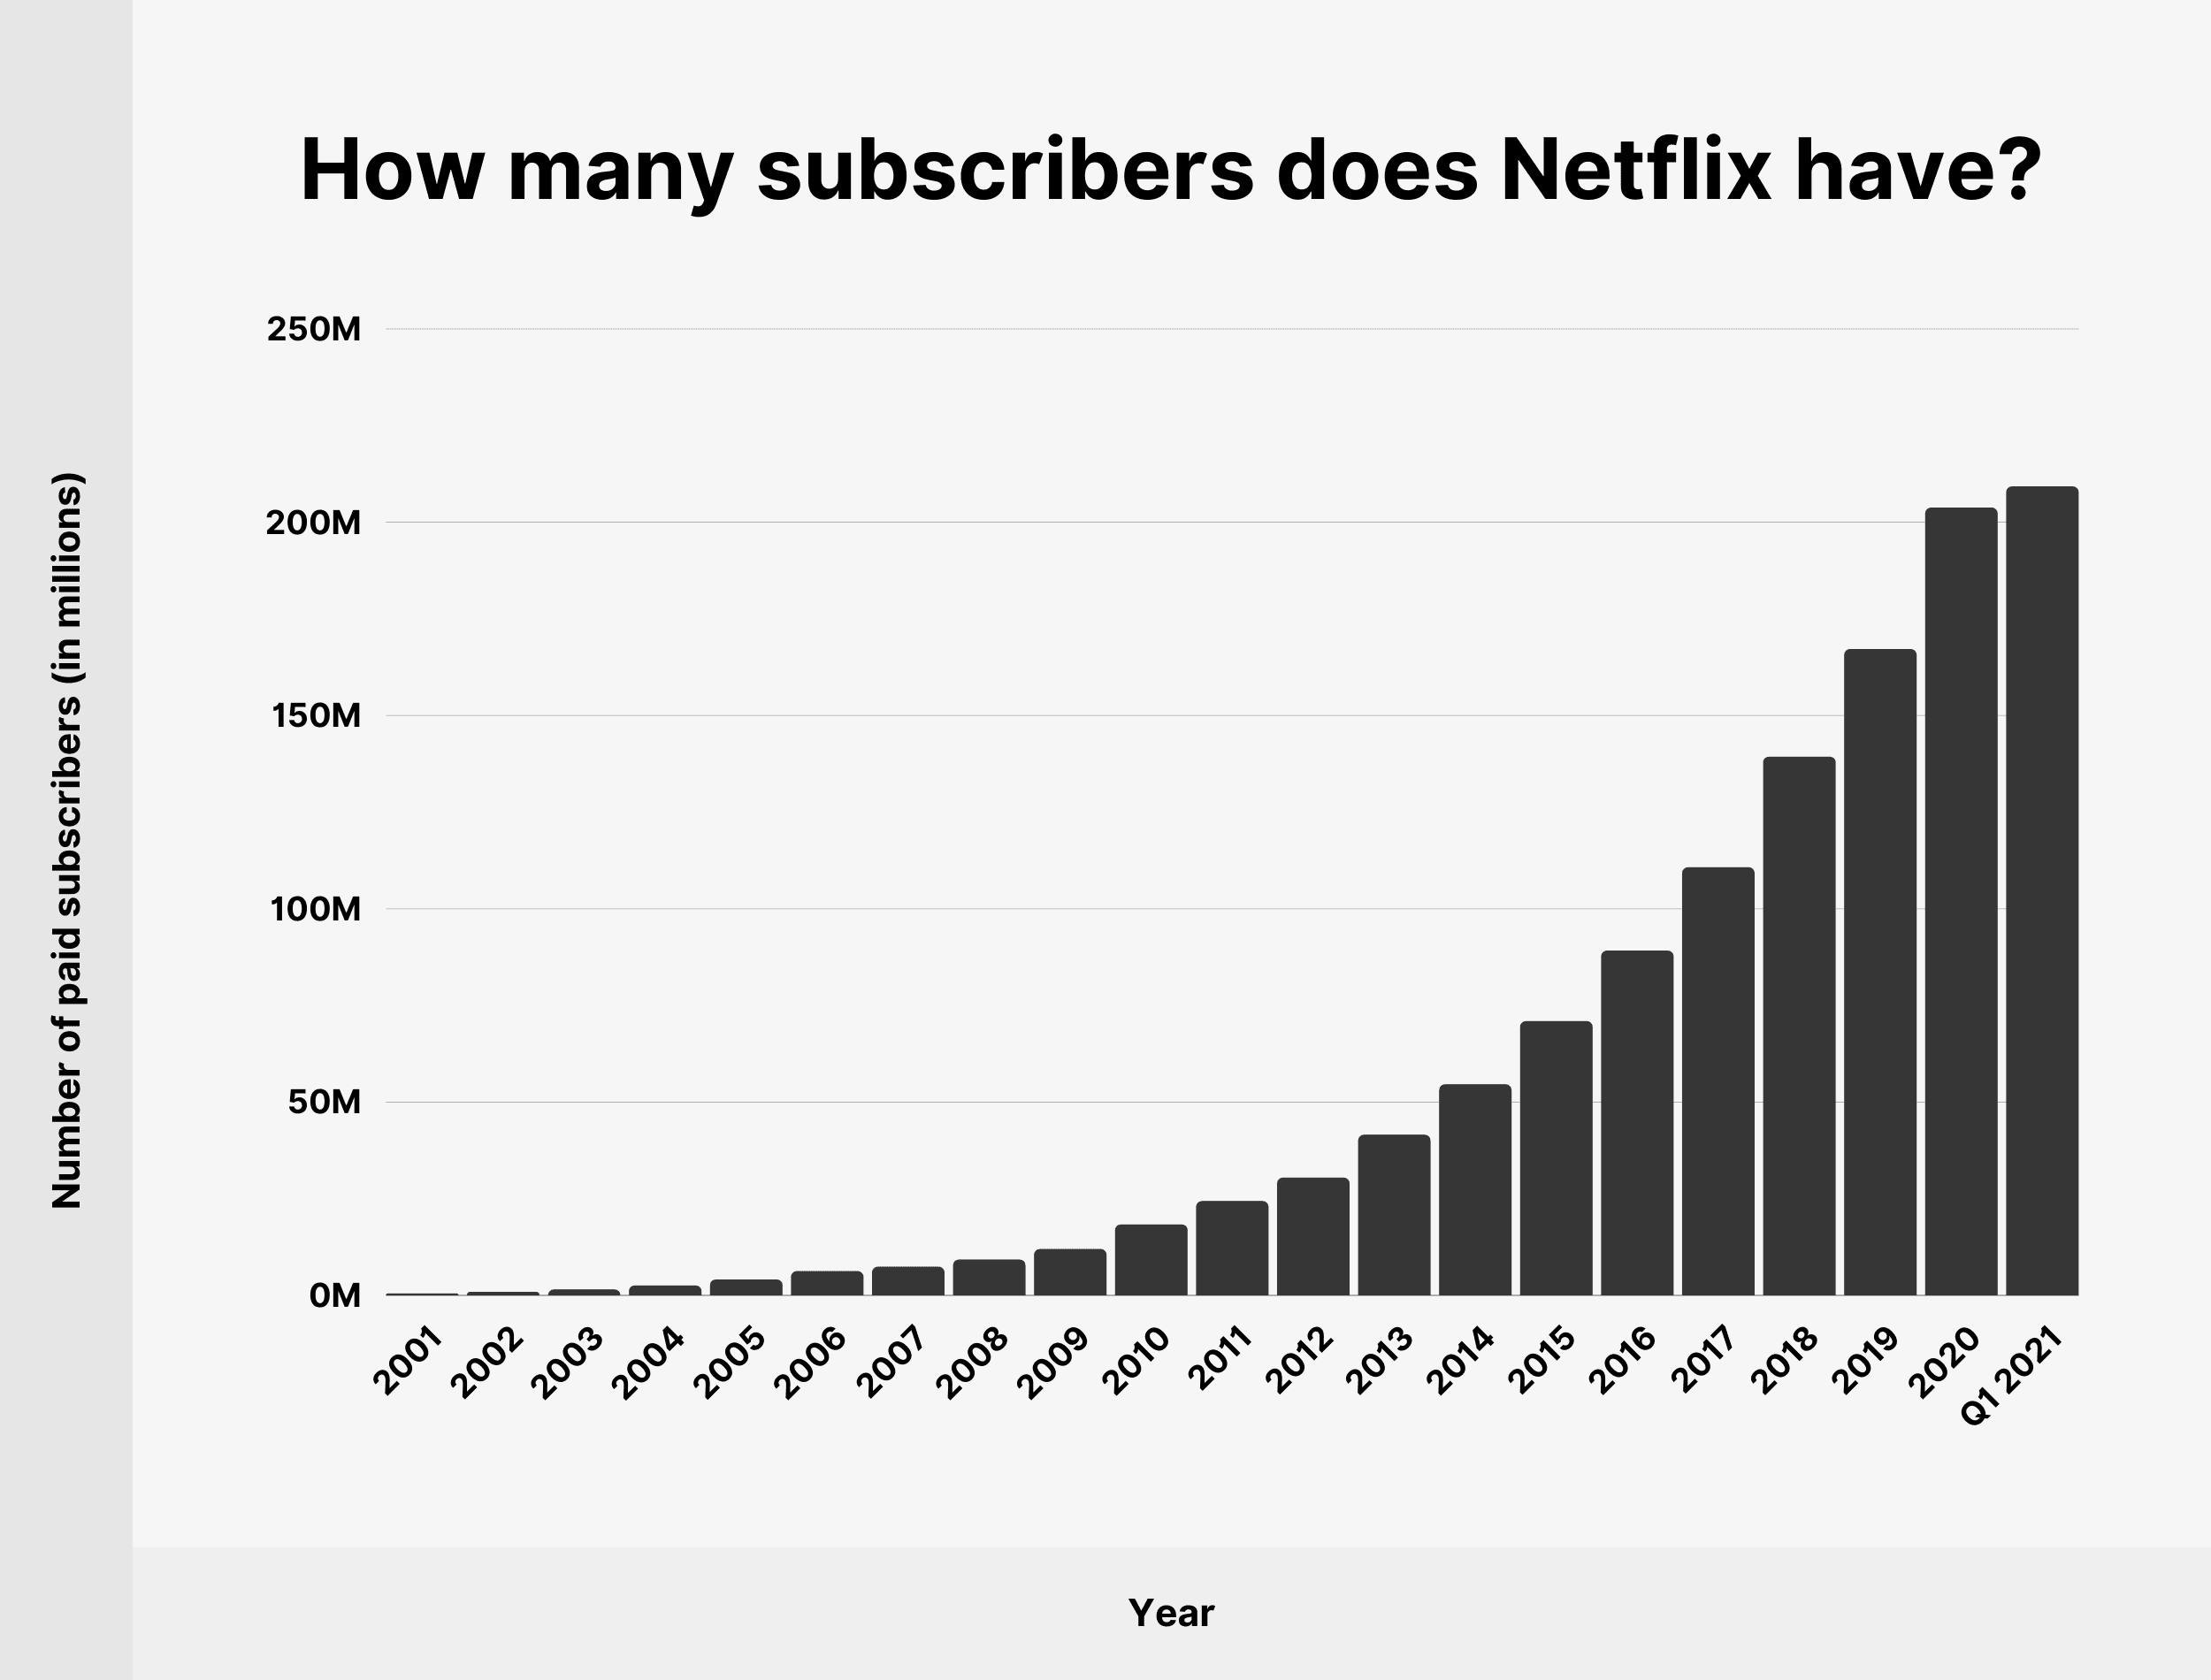

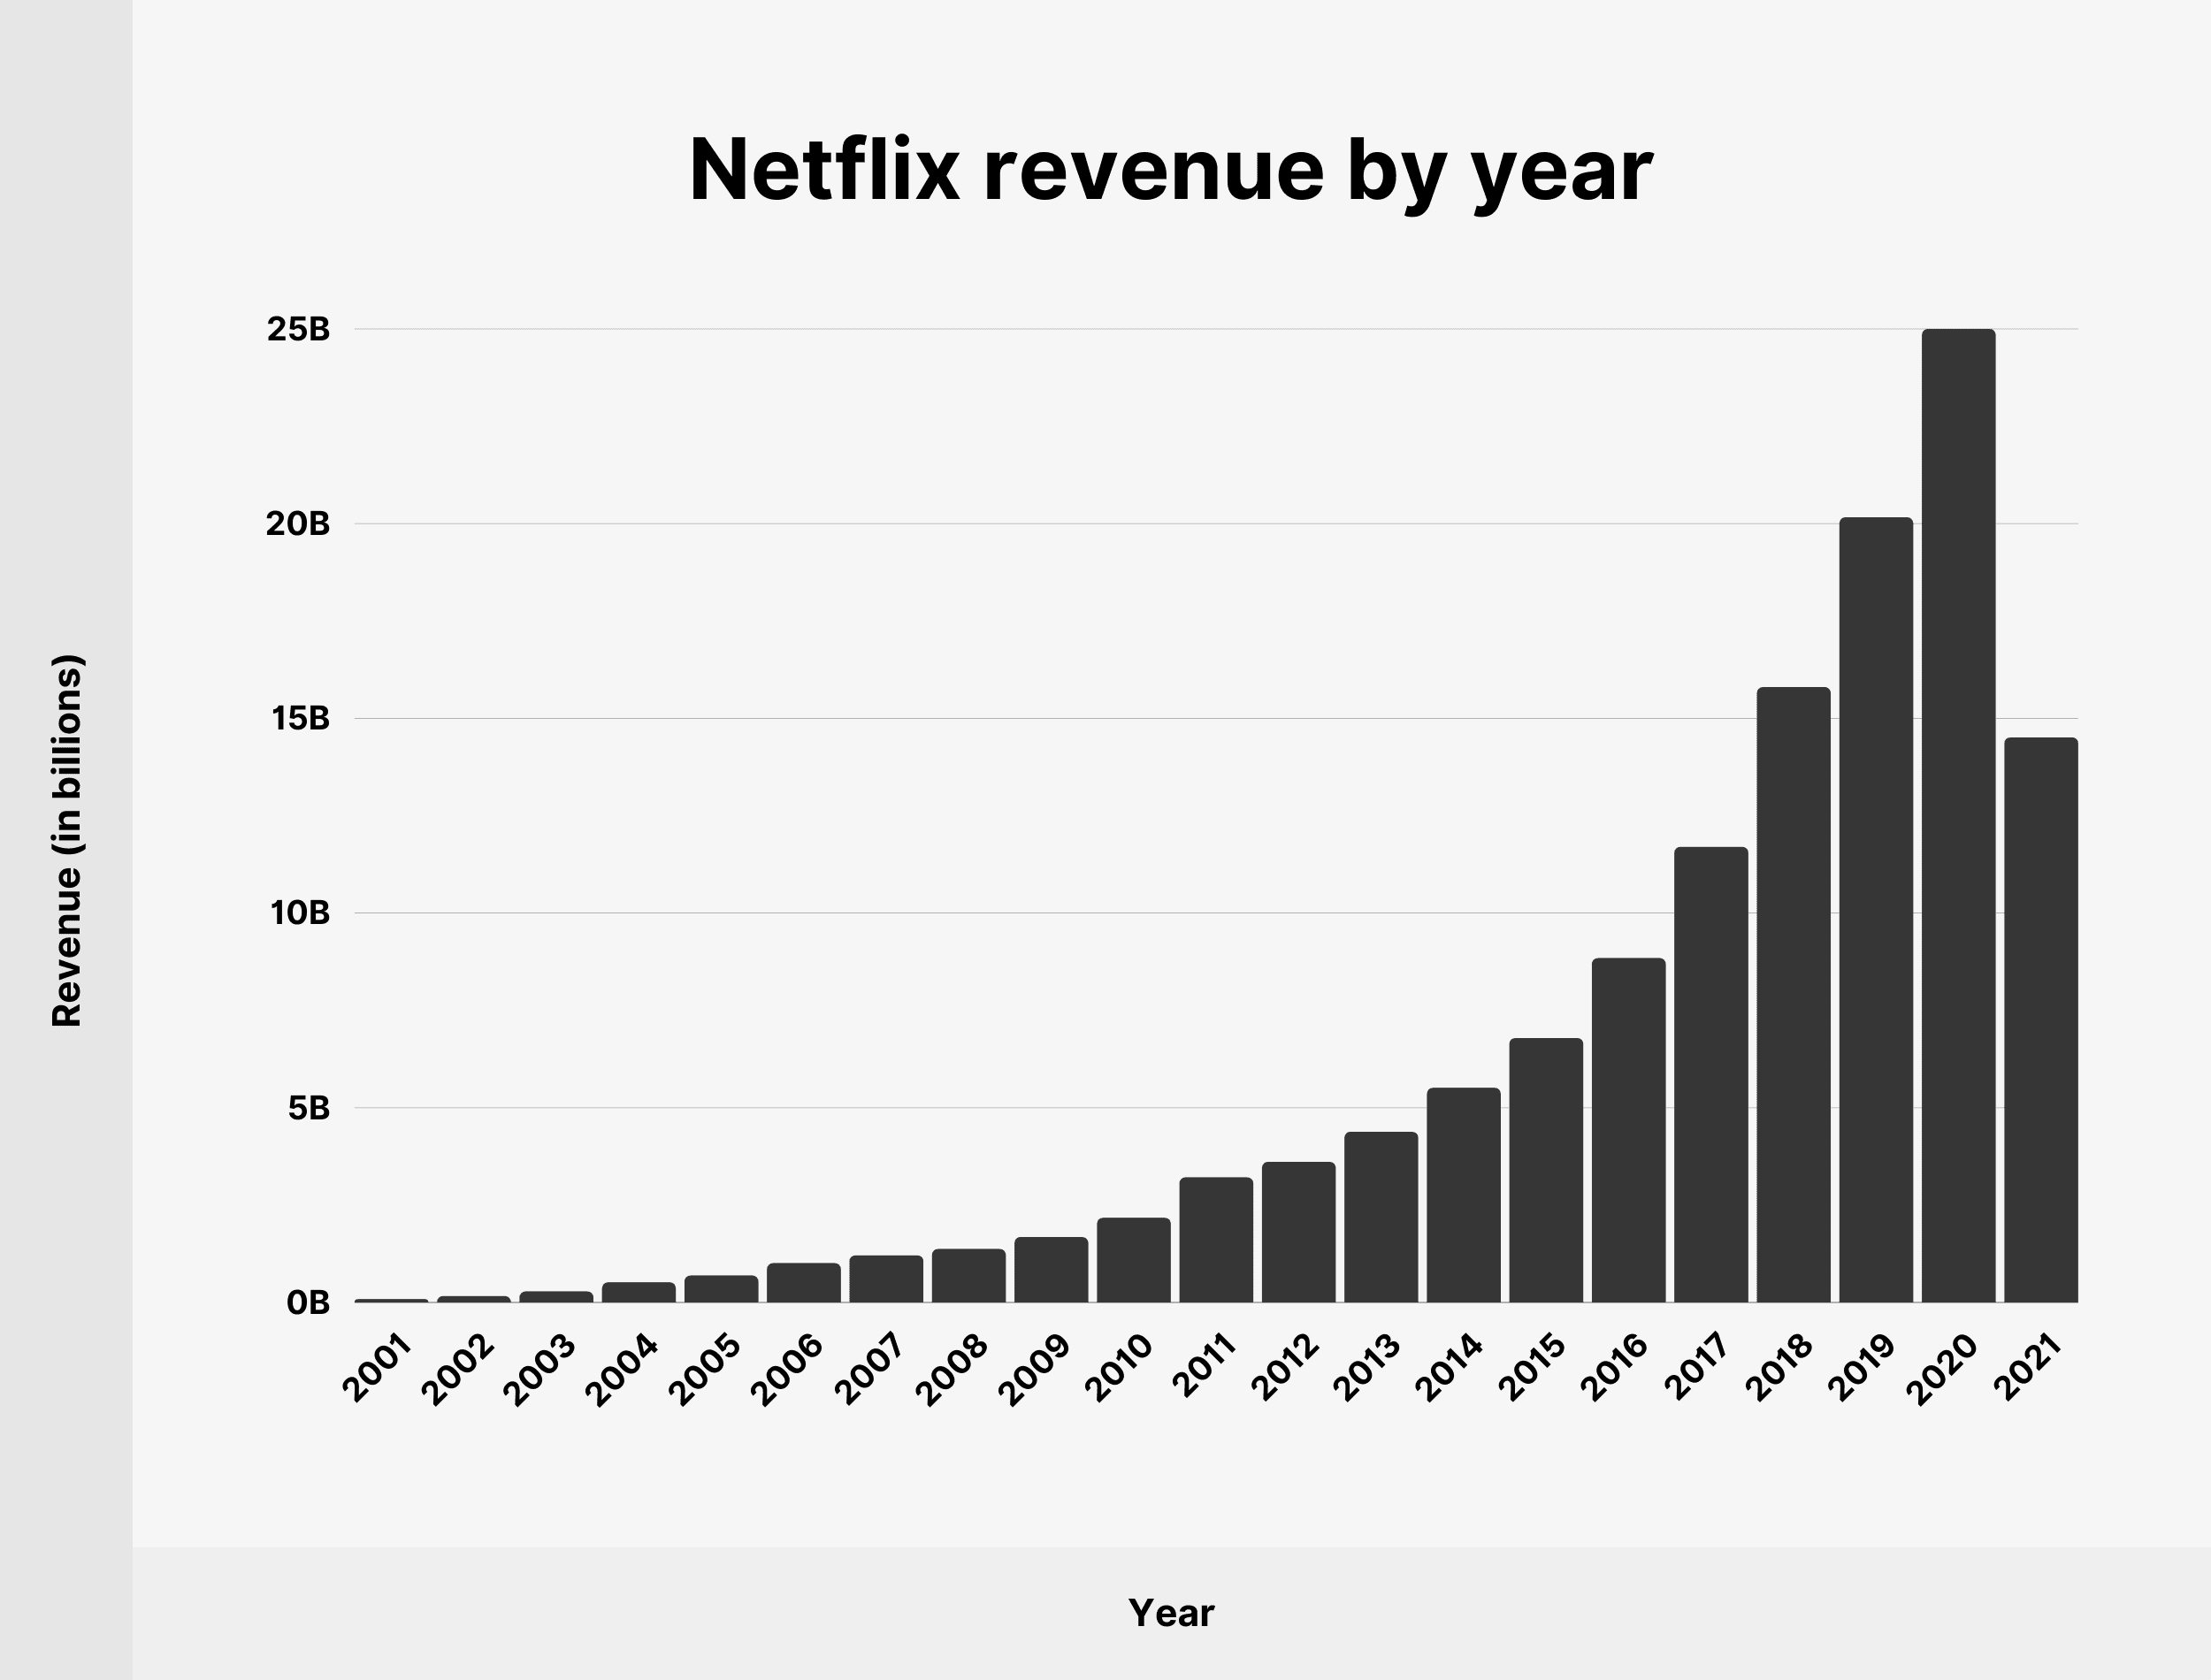

*  <h4 style="text-align: left;color:purple; ">by looking at this chart ,we can clearly observe from 2015 to 2017 netflix double down on it's subscribers and revenue which kept increasing further down the years 

In [16]:
release_year_total = data['release_year'].value_counts().sort_index()
release_year_total
release_year_data=data.groupby('Type')['release_year'].value_counts().sort_index().unstack().fillna(0).T
release_year_data['Movie'] = release_year_data['Movie'].apply(int)
release_year_data['TV Show'] = release_year_data['TV Show'].apply(int)
#release_year_data

In [17]:
x= release_year_total.index
y0 = release_year_total
fig = go.Figure()
x1 =release_year_data.index
y1=release_year_data['Movie']
y2=release_year_data['TV Show']
# Add traces
fig.add_trace(go.Scatter(x=x, y=y0,line=dict(color='grey', width=4, dash='solid'),
                    mode='lines+markers',
                    name='Total',marker=dict(color="grey")))
fig.add_trace(go.Scatter(x=x1, y=y1,
                    mode='lines+markers',
                    name='movie',marker=dict(color="#f47c64")))
fig.add_trace(go.Scatter(x=x1, y=y2,
                    mode='lines+markers',line=dict(color='darkcyan', width=2),
                    name='tv show'))
fig.update_layout(legend_orientation="h",template='plotly_dark',
                  legend=dict(x=0, y=1, traceorder="normal"),
                  
                  xaxis_title="Year",
                   title={'text':'Yearwise Movies and TV shows Released ','font':{'size':19}},
                  #paper_bgcolor='#edeeee',
                 # plot_bgcolor='#edeeee',
                  yaxis_title="count ",height=500,
                  margin=dict(l=50, r=30, t=70, b=40))
fig.add_vrect(x0=1920,x1=2000, line_width=0,fillcolor="purple", opacity=0.1,annotation_text="netfilx does not interested in adding old movies and shows to their library",
             annotation_position="right",annotation=dict(font_size=17, font_family="Times New Roman",bgcolor='black'))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

<h3 style="text-align: left;color:darkblue; ">let's zoom in above chart and look closely from 2000

In [18]:
x= release_year_total[52:].index
y0 = release_year_total[52:]
fig = go.Figure()
x1 =release_year_data.loc[2000:].index
y1=release_year_data.loc[2000:]['Movie']
y2=release_year_data.loc[2000:]['TV Show']
# Add traces
fig.add_trace(go.Scatter(x=x, y=y0,line=dict(color='grey', width=4, dash='solid'),
                    mode='lines+markers',
                    name='Total',marker=dict(color="grey")))
fig.add_trace(go.Scatter(x=x1, y=y1,
                    mode='lines+markers',
                    name='movie',marker=dict(color="#f47c64")))
fig.add_trace(go.Scatter(x=x1, y=y2,
                    mode='lines+markers',line=dict(color='darkcyan', width=2, dash='solid'),
                    name='tv show',marker=dict(color="darkcyan")))
fig.update_layout(legend_orientation="h",template='plotly_dark',
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title={'text':'Yearwise Movies and TV shows Released  ','font':{'size':19}},
                  xaxis_title="Year",
                  #paper_bgcolor='#edeeee',
                 # plot_bgcolor='#edeeee',
                  yaxis_title="count ",width=700,height=500,
                  margin=dict(l=50, r=0, t=70, b=40))
fig.add_vrect(x0=2013,x1=2021, line_width=0,fillcolor="red", opacity=0.1,annotation_text="netfilx released more than 1500 original content",
             annotation_position="top",annotation=dict(font_size=16, font_family="Times New Roman",bgcolor='black'))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

 <h4 style="text-align: left;color:purple; "><b>Observation</b></h4>
 
* <h4 style="text-align: left;color:purple; ">from 2013 netflix started producing it's original content and till this date produced more than 1500 original content this gives netflix edge over their competition because this content is only availabel on netfilx 
* <h4 style="text-align: left;color:purple; ">increase  in revenus over the years allows netflix to buy more movies and tv show rights and add this to their library 

<span style="font-family:Ostwald;background-color: #05368B;text-align: left;color:white;padding: 10px;font-size: 24px; margin: 4px 2px;border-radius: 15px;">Is their any relation between relaease year and added year ?</span>

In [19]:

fig = go.Figure()
x1 = type_data.index
x2 =release_year_data.loc[2008:].index
y1=type_data['Movie']
y2=type_data['TV Show']
y3=release_year_data.loc[2008:]['Movie']
y4=release_year_data.loc[2008:]['TV Show']
# Add traces

fig.add_trace(go.Scatter(x=x1, y=y1,
                    mode='lines+markers',
                    name='movie added',marker=dict(color="purple")))
fig.add_trace(go.Scatter(x=x1, y=y2,
                    mode='lines+markers',line=dict(color='darkblue', width=2, dash='solid'),
                    name='tv show added',marker=dict(color="blue")))
fig.add_trace(go.Scatter(x=x2, y=y3,line=dict(dash='solid'),
                    mode='lines+markers',
                    name='movie release  ',marker=dict(color='#f47c64')))
fig.add_trace(go.Scatter(x=x2, y=y4,
                    mode='lines+markers',line=dict(color='darkcyan', width=2, dash='solid'),
                    name='tv show release   ',marker=dict(color="cyan")))

fig.update_layout(legend_orientation="h",template='plotly_dark',
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title={'text':"release year vs added to netflix",'font':{'size':20}},
                  xaxis_title="Year",
                  #paper_bgcolor='#edeeee',
                 # plot_bgcolor='#edeeee',
                  yaxis_title="count ",width=800,height=500,
                  margin=dict(l=50, r=30, t=70, b=40))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

<h4 style="text-align: left;color:darkblue; "><b>note : we are looking at this graph only from year 2008 because netflix launched it's streaming services after 2008<b></h4>

 <h4 style="text-align: left;color:purple; "><b>Observation</b></h4>
 
* <h4 style="text-align: left;color:purple; ">mostly you see linear relationship betweeen content released vs conted added in this graph ,but in 2018 and 2019 
netfix really go big by adding 2661 movies to their platform although movies released in this year are only 1396 
* <h4 style="text-align: left;color:purple; ">we can see in 2020 to 2021 really less content is added compared to previous years beacause covid 19 panadmic hit the 
world which cause delays in production ,postponding or even canceling release of some tv shows and movies

>  <h2 style="text-align: left;color:darkblue; "> let;s look at each and every movies added to netflix yearwise

In [20]:
movies = data[data['Type']=='Movie']
tv_show = data[data['Type']=='TV Show']
def country_table(country:str,content_type='movie' ):
    if content_type== 'movie':
        sort_country = movies[movies['country']== country]
        table= sort_country[['title','release_year']].sort_values(by='release_year',ascending=False).reset_index(drop=True)
        return table
    if content_type == 'TV':
        sort_country= tv_show[tv_show['country']== country]
        table = sort_country[['title','release_year']].sort_values(by='release_year',ascending=False).reset_index(drop=True)
        
        return table

In [21]:
upto_2014=movies[(movies['year_added']!=2015) &(movies['year_added']!=2016) &(movies['year_added']!=2017) &(movies['year_added']!=2018) &(movies['year_added']!=2019) & (movies['year_added']!=2020) &(movies['year_added']!=2021) ]
upto_2014=upto_2014[['title','year_added']].sort_values(by='year_added').reset_index()
upto_2014
year_2015= movies[movies['year_added']==2015]
year_2016= movies[movies['year_added']==2016]
year_2017= movies[movies['year_added']==2017]
year_2018= movies[movies['year_added']==2018]
year_2019= movies[movies['year_added']==2019]
year_2020= movies[movies['year_added']==2020]
year_2021= movies[movies['year_added']==2021]

In [22]:
def year_title(data,header_color= '#f47c64',cell_color='#ffdac4'):
    Table= go.Table( columnorder = [1,2,3],
      columnwidth = [25,20],
        header=dict(values=['<b>Title<b>','<b>Date <b>'],
                    line_color='black',font=dict(color='black',size= 15),height=40,
                    fill_color=header_color,
                    align=['left','center']),
            cells=dict(values=[data.title,data.date_added],
                   fill_color=cell_color,line_color='grey',
                       font=dict(color='black', family="Lato", size=15),
                   align='left'))
    return Table

In [23]:
from plotly.subplots import make_subplots
fig = make_subplots(subplot_titles=['movies added till 2014:Total 45 Movies','2015:Total 56 Movies',
                                    '2016:Total 251 Movies','2017::Total 836 Movies',
                                    '2018:Total 1237 Movies','2019:Total 1424 Movies',
                                    '2020:Total 1284 Movies','2021::Total 56 Movies'],
    rows=4 ,cols=2,
    shared_xaxes=True,
    #olumn_titles=['movie','2015','2016','2017'],
    vertical_spacing=0.04,horizontal_spacing=0.03,
   specs=[[{"type": "table"},{"type": "table"}],
          [ {"type": "table"},{"type": "table"}],
          [ {"type": "table"},{"type": "table"}],
         [ {"type": "table"},{"type": "table"}]]
    
           
)
fig.add_trace(go.Table( columnorder = [1,2,3],
      columnwidth = [25,20],
        header=dict(values=['<b> Title<b>','<b>Year<b>'],
                    line_color='black',font=dict(color='black',size= 15),height=40,
                    fill_color='#f47c64',
                    align=['left','center']),
            cells=dict(values=[upto_2014.title,upto_2014.year_added],
                   fill_color='#ffdac4',line_color='grey',
                       font=dict(color='black', family="Lato", size=15),
                   align='left')),row=1,col=1)

fig.add_trace(year_title(year_2015),row=1,col=2)
fig.add_trace(year_title(year_2016),row=2,col=1)
fig.add_trace(year_title(year_2017),row=2,col=2)
fig.add_trace(year_title(year_2018),row=3,col=1)
fig.add_trace(year_title(year_2019),row=3,col=2)
fig.add_trace(year_title(year_2020),row=4,col=1)
fig.add_trace(year_title(year_2021),row=4,col=2)

fig.update_layout( width=800,height=2000,
                  title ={'text': "<b style:'color:blue;'>Movies added on Netflix Yearwise</b>", 'font': {'size': 30}},title_x=0.25,
    
     title_font_family="Times New Roman",
    title_font_color="darkblue")#,margin=dict(l=0, r=0, t=70, b=40))
fig.show()

>  <h2 style="text-align: left;color:darkblue; "> now looking at each and every TV show added on netflix 

In [24]:
upto_2014_TV=tv_show[(tv_show['year_added']!=2015) &(tv_show['year_added']!=2016) &(tv_show['year_added']!=2017) &(tv_show['year_added']!=2018) &(tv_show['year_added']!=2019) & (tv_show['year_added']!=2020) &(tv_show['year_added']!=2021) ]
upto_2014_TV=upto_2014_TV[['title','year_added']].sort_values(by='year_added').reset_index()
upto_2014_TV
year_2015_TV= tv_show[tv_show['year_added']==2015]
year_2016_TV= tv_show[tv_show['year_added']==2016]
year_2017_TV= tv_show[tv_show['year_added']==2017]
year_2018_TV= tv_show[tv_show['year_added']==2018]
year_2019_TV= tv_show[tv_show['year_added']==2019]
year_2020_TV= tv_show[tv_show['year_added']==2020]
year_2021_TV= tv_show[tv_show['year_added']==2021]

In [25]:
from plotly.subplots import make_subplots
fig = make_subplots(subplot_titles=['TV shows added till 2014:Total 11 TV shows','2015:Total 26 TV shows',
                                    '2016:Total 175 TV shows','2017::Total 349 TV shows',
                                    '2018:Total 411 TV shows','2019:Total 592 TV shows',
                                    '2020:Total 595 TV shows','2021::Total 505 TV shows'],
    rows=4 ,cols=2,
    shared_xaxes=True,
    #olumn_titles=['movie','2015','2016','2017'],
    vertical_spacing=0.04,horizontal_spacing=0.03,
   specs=[[{"type": "table"},{"type": "table"}],
          [ {"type": "table"},{"type": "table"}],
          [ {"type": "table"},{"type": "table"}],
         [ {"type": "table"},{"type": "table"}]]
    
           
)
fig.add_trace(go.Table( columnorder = [1,2,3],
      columnwidth = [25,20],
        header=dict(values=['<b> Title<b>','<b>Year<b>'],
                    line_color='black',font=dict(color='black',size= 15),height=40,
                    fill_color='cyan',
                    align=['left','center']),
            cells=dict(values=[upto_2014_TV.title,upto_2014_TV.year_added],
                   fill_color='lightcyan',line_color='grey',
                       font=dict(color='black', family="Lato", size=15),
                   align='left')),row=1,col=1)

fig.add_trace(year_title(year_2015_TV,header_color='cyan',cell_color='lightcyan'),row=1,col=2)
fig.add_trace(year_title(year_2016_TV,header_color='cyan',cell_color='lightcyan'),row=2,col=1)
fig.add_trace(year_title(year_2017_TV,header_color='cyan',cell_color='lightcyan'),row=2,col=2)
fig.add_trace(year_title(year_2018_TV,header_color='cyan',cell_color='lightcyan'),row=3,col=1)
fig.add_trace(year_title(year_2019_TV,header_color='cyan',cell_color='lightcyan'),row=3,col=2)
fig.add_trace(year_title(year_2020_TV,header_color='cyan',cell_color='lightcyan'),row=4,col=1)
fig.add_trace(year_title(year_2021_TV,header_color='cyan',cell_color='lightcyan'),row=4,col=2)

fig.update_layout( width=800,height=2000,
                  title ={'text': "<b style:'color:blue;'>TV shows added on Netflix Yearwise</b>", 'font': {'size': 30}},title_x=0.25,
    
     title_font_family="Times New Roman",
    title_font_color="darkblue")#,margin=dict(l=0, r=0, t=70, b=40))
fig.show()

  <h1 style="text-align: left;color:darkblue; ">2.3) Monthwise Analysis
     <a id="2.3"></a>

In [26]:
month_wise_release = data['month_added'].value_counts().loc[:'February']
#month_wise_release

In [27]:
fig = px.bar(x =month_wise_release.index,y= month_wise_release, height=500,color=month_wise_release.index,
             template='plotly_dark',color_discrete_sequence=['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','olive','olive']) #px.colors.sequential.Purp
fig.update_traces(showlegend=False)
fig.update_traces( marker_line_color='skyblue',
                  marker_line_width=2.5, opacity=1.0)
fig.update_layout(margin=dict(l=50, r=30, t=70, b=40))
fig.update_xaxes(tickangle=0)
fig.add_hline(y=700, line_width=3, line_dash="dash", line_color="black")
#fig.add_hrect(y0=500,y1=626, line_width=0, fillcolor="green", opacity=0.2
              #,annotation_text="Netlflix does not like feb and may",
              #annotation_position="right top",annotation=dict(font_size=20, font_family="Times New Roman")
     #        )
fig.update_layout(template='plotly_dark',legend_orientation= 'h',
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title={'text':"Monthwise content  added to netflix",'font':{'size':25}},
                  xaxis_title="",height= 500,
    
    #font_color = 'darkslategrey',
                  #paper_bgcolor='#edeeee',
                 # plot_bgcolor='#edeeee',
                  yaxis_title=" "
                  ,margin=dict(l=50, r=30, t=70, b=0)
                 )
fig.update_xaxes(categoryorder='array', categoryarray= [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig.show()

 <h4 style="text-align: left;color:purple; "><b>Observation</b></h4>
 
* <h4 style="text-align: left;color:purple; ">except Feb an May every other month has added content count close to 700 or above 700 

* <h4 style="text-align: left;color:purple; ">july and decemeber has highest number of added content  827 and 812 respectively

<span style="font-family:Ostwald;background-color: #05368B;text-align: left;color:white;padding: 10px;font-size: 24px; margin: 4px 2px;border-radius: 15px;"> How distribution looks in terms of movies and tv show ? </span>

In [28]:
fig = px.histogram(data_frame=data, x= 'month_added',color ='Type',height= 500,template='plotly_dark',color_discrete_sequence=['#f47c64','darkcyan'])
fig.update_xaxes(categoryorder='array', categoryarray= [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig.update_traces( marker_line_color='black',
                  marker_line_width=2.5, opacity=0.9)
fig.update_layout(template='plotly_dark',legend_orientation= 'h',
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title={'text':"Monthwise content  added to netflix",'font':{'size':25}},
                  xaxis_title="",height= 500,
    
    #font_color = 'darkslategrey',
                  #paper_bgcolor='#edeeee',
                 # plot_bgcolor='#edeeee',
                  yaxis_title=" "
                  ,margin=dict(l=50, r=30, t=70, b=0)
                 )
fig.show()

  <h1 style="text-align: left;color:darkblue; ">2.4) Duration Analysis
     <a id="2.4"></a>

<h4 style="text-align: left;color:darkblue; "><b>note: duration column gives runtime for movies and 
    number of seasons for tv shows<b></h4>

<span style="font-family:Ostwald;background-color: #05368B;text-align: left;color:white;padding: 10px;font-size: 24px; margin: 4px 2px;border-radius: 15px;"> 
What is the runtime for netflix movies? </span>

In [29]:
# little prprocessing 
movies["duration"] = movies.duration.str.replace(" min",'').astype(int)

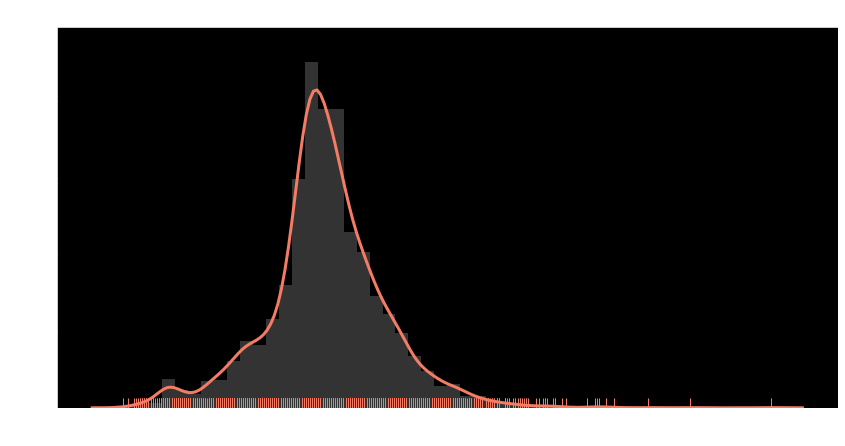

<Figure size 1152x720 with 0 Axes>

In [30]:
plt.figure(figsize=(14,7))
plt.style.use("dark_background")
sns.distplot(movies.duration.sort_values(),color='grey',rug=True, kde_kws={"color": "#f47c64", "lw": 3, "label": "kde"},rug_kws={"color": "#f47c64"}
            #,hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"}
            ).set_title("Movie distribution according to runtime duration", fontsize = 20)
plt.figure(figsize=(16,10))
plt.style.use("dark_background")

 <h4 style="text-align: left;color:purple; "><b>Observation</b></h4>
 
* <h4 style="text-align: left;color:purple; ">most of the movies runtime is between 90 to 120 minutes
* <h4 style="text-align: left;color:purple; ">movies with runtime less than 40 miuntes are considerd as shortfilm ,our data contains 182  such as shortfilms 


In [31]:
shortfilm=movies[movies["duration"] <=40]
fig=go.Figure(go.Table( columnorder = [1,2,3],
      columnwidth = [25,10],
        header=dict(values=['<b> Title<b>','<b>Duration<br>(minutes)<b>'],
                    line_color='black',font=dict(color='black',size= 15),height=40,
                    fill_color='#dd571c',
                    align=['left','center']),
            cells=dict(values=[shortfilm.title,shortfilm.duration],
                   fill_color='#ffdac4',line_color='grey',
                       font=dict(color='black', family="Lato", size=15),
                   align='left')))
fig.update_layout(width=600, title ={'text': "<b style:'color:red;'>Shortfilms on Netflix</b>", 'font': {'size': 25}},title_x=0.5
                 )

<span style="font-family:Ostwald;background-color: #05368B;text-align: left;color:white;padding: 10px;font-size: 24px; margin: 4px 2px;border-radius: 15px;"> 
What are the movies with longest duration ? </span>




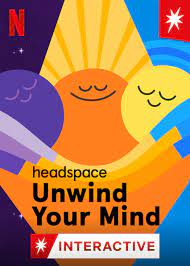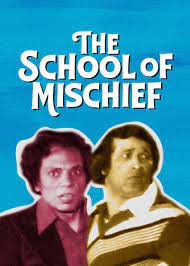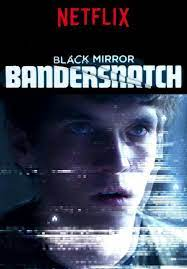!

<span style="font-family:Ostwald;background-color: #05368B;text-align: left;color:white;padding: 10px;font-size: 24px; margin: 4px 2px;border-radius: 15px;"> How many tv shows released by netflix seasonwise ?</span>

In [32]:
#tv_show.duration.unique()

In [33]:
tv_show['seasons'] = tv_show['duration'].apply(lambda x: x.split(' ')[0])
tv_show['seasons']=tv_show['seasons'].apply(int)
#tv_show.seasons.unique()

In [34]:
seasons=tv_show.seasons.value_counts()
seasonwise_tvshow= pd.DataFrame({'seasons':seasons.index,'Total count':seasons.values})
#seasonwise_tvshow.reset_index(drop=True ,inplace=True)
#seasonwise_tvshow

In [35]:
fig =px.bar(data_frame=seasonwise_tvshow, x='seasons',y= 'Total count',template='plotly_dark',orientation='v',height = 500
           ,color_discrete_sequence=['darkcyan'],category_orders=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
fig.update_traces( marker_line_color='aqua',
                  marker_line_width=2.5, opacity=1.0)
fig.update_xaxes(tickvals=[1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14,15,16,17] ,tickcolor='aqua', ticklen=10,ticks="outside", tickwidth=2,)
fig.update_yaxes(showgrid=False)
fig.add_annotation(x=17, y=1,
            text="Grey's Anatomy",
            showarrow=True,   textangle=0,font=dict(
            family="Courier New, monospace",
            size=16,
            color="red"
            ),
                   
            arrowhead=1)
"""fig.update_layout( margin=dict( t=60, b=80),
    autosize=True,
    title ={'text': "<b style:'color:blue;'>TV shows seasonwise</b>", 'font': {'size': 25}},title_x=0.5,
    
     title_font_family="Times New Roman",
    title_font_color="white",
    font_color='white',
    
#xaxis_title={'text': "<b style:'color:blue;'>Movies</b>", 'font': {'size':16},'standoff':20},
#yaxis_title={'text': "<b style:'color:blue';></b>", 'font': {'size': 15}}, 
   #paper_bgcolor='black',
    plot_bgcolor='rgba(0,0,0,0)')"""
fig.update_layout(margin=dict( t=20,r=10)
                 # , title ={'text': "<b style:'color:blue;'>TV shows distribution by numbers of seasons</b>", 'font': {'size': 20}},title_x=0.5
                 )
fig.show()

<span style="font-family:Ostwald;background-color:darkblue;text-align: left;color:white;padding: 10px;font-size: 24px; margin: 4px 2px;border-radius: 15px;"> What are the tv shows with more than 10 season  ?</span>

********

<h6 style="text-align: left;color:darkblue;font-size: 14px; "><b>  
Grey's Anatomy:<span style="color: orange"> 17 seasons</span><br>&nbsp<br>    
Supernatural:<span style="color: orange"> 15 seasons</span><br>&nbsp<br>
NCIS:<span style="color: orange"> 15 seasons</span><br>&nbsp<br>
COMEDIANS of the world:<span style="color: orange"> 13 seasons</span><br>&nbsp<br>
Heartland:<span style="color: orange"> 13 seasons</span><br>&nbsp<br>
Trailer Park Boys:<span style="color: orange"> 12 seasons</span><br>&nbsp<br>
Criminal Minds:<span style="color: orange"> 12 seasons</span><br>&nbsp<br>
Cheers:<span style="color: orange"> 11 seasons</span><br>&nbsp<br>
Stargate SG-1:<span style="color: orange"> 10 seasons</span><br>&nbsp<br>
LEGO Ninjago: Masters of Spinjitzu:<span style="color: orange"> 10 seasons</span><br>&nbsp<br>
Shameless (U.S.):<span style="color: orange"> 10 seasons</span><br>&nbsp<br>
The Walking Dead :<span style="color: orange"> 10 seasons</span><br>&nbsp<br>
Danger Mouse: Classic Collection:<span style="color: orange"> 10 seasons</span><br>&nbsp<br>
Dad's Army:<span style="color: orange"> 10 seasons</span?</h6>

   <h1 style="text-align: left;color:darkblue; ">2.5) Genres Analysis
     <a id="2.5"></a>

In [36]:
top_15_genres=data.listed_in.value_counts(ascending=True).tail(15).to_frame()
#top_15_genres.head()
fig = px.bar(x= top_15_genres.listed_in , y = top_15_genres.index, orientation='h',template='plotly_dark',height = 500,width =800,
             color = top_15_genres.index,
             color_discrete_sequence=['lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral',
                                      'lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral',
                                      'lightcoral','lightcoral','brown'])
fig.update_xaxes(showgrid=False)
fig.update_traces(showlegend=False)
#fig.update_yaxes(tickcolor='aqua', ticklen=5,ticks="inside", tickwidth=2)
fig.update_layout(
                  title={'text':"Top 15 genres on netflix",'font':{'size':25}},
                  xaxis_title="",height= 500,title_x= 0.6,
    
    #font_color = 'darkslategrey',
                  #paper_bgcolor='#edeeee',
                 # plot_bgcolor='#edeeee',
                  yaxis_title=" "
                  ,margin=dict(l=30, r=30, t=70, b=0)
                 )
fig.update_yaxes(tickcolor='lightcoral', ticklen=7,ticks="outside", tickwidth=1,)
fig.show()

 <h4 style="text-align: left;color:purple; "><b>Observation</b></h4>
 
* <h4 style="text-align: left;color:purple; ">netflix has most amount of content in dramas ,documentries and comedy genres 

   <h1 style="text-align: left;color:darkblue; ">2.6) Title and Description  Analysis
     <a id="2.6"></a>

<span style="font-family:Ostwald;background-color:darkblue;text-align: left;color:white;padding: 10px;font-size: 24px; margin: 4px 2px;border-radius: 15px;"> What are the most frequent words in title ?</span>

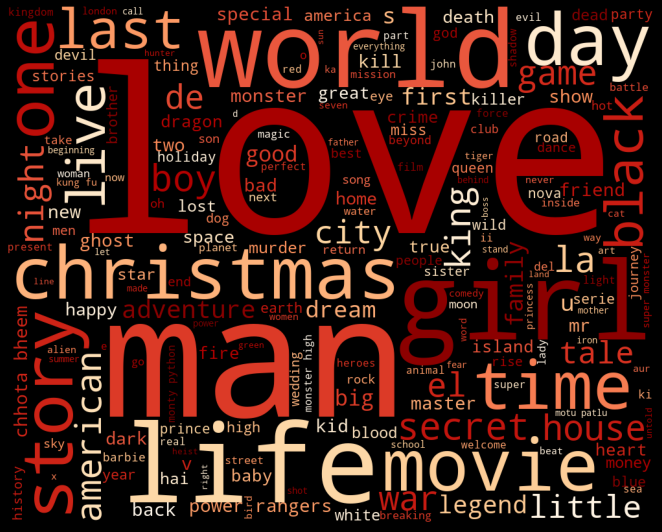

In [37]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''
for line in data.title:
    words = line.lower().split()
    comment_words += " ".join(words)+" "
wordcloud = WordCloud(width = 1000, height = 800, background_color ='black',colormap='OrRd', stopwords = stopwords, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (9, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
#plt.title('Most frequent word in movie title',fontdict={'fontsize':30,'color':'white'})
plt.show()
#plt.savefig('wordcloud.png',trasparent = True)

<span style="font-family:Ostwald;background-color:darkblue;text-align: left;color:white;padding: 10px;font-size: 24px; margin: 4px 2px;border-radius: 15px;"> What are the most frequent words in description ?</span>

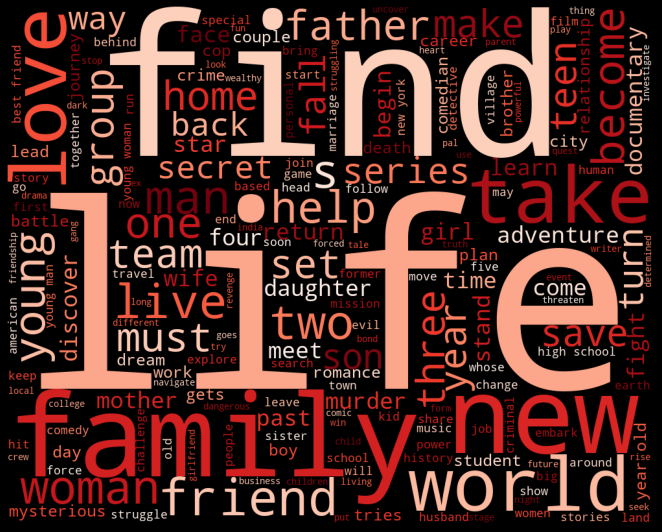

In [38]:

comment_words = ''
for line in data.description:
    words = line.lower().split()
    comment_words += " ".join(words)+" "
wordcloud = WordCloud(width = 1000, height = 800, background_color ='black',colormap='Reds', stopwords = stopwords, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (9, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
#plt.savefig('wordcloud.png',trasparent = True)    

 <h1 style="text-align: left;color:darkblue; ">2.7) Directors Analysis
     <a id="2.7"></a>

In [39]:
top_directors = data['director'].value_counts(ascending=True)[:-1].tail(15)
#top_directors

In [40]:
fig = px.bar(y=top_directors.index,x=top_directors.values,orientation='h',template='plotly_dark',
            color_discrete_sequence=['orange'] )
fig.update_layout(
                  title={'text':"Top 15 directors on netflix wth most content",'font':{'size':25}},
                  xaxis_title="",height= 500,title_x=0.5,
    
   # font_color = 'darkslategrey',
                  #paper_bgcolor='#edeeee',
                 # plot_bgcolor='#edeeee',
                  yaxis_title=" "
                  ,margin=dict(l=30, r=30, t=70, b=0)
                 )
#fig.update_xaxes(showgrid=False)
fig.update_yaxes(tickcolor='white', ticklen=7,ticks="outside", tickwidth=2,)
fig.show()

 <h4 style="text-align: left;color:purple; "><b>Observation</b></h4>
 
* <h4 style="text-align: left;color:purple; ">amongest the top 5 directores rajiv chilaka and suhas kadav  released animated movies on netflix.</h4>
* <h4 style="text-align: left;color:purple; ">rajiv chilaka has relaeased 19 chota bheem animated movies on netflix similarely suhas kadav released 16 motu patlu movies on netflix,chota bheem and motu patlu is very popular cartoon character in india.</h4>

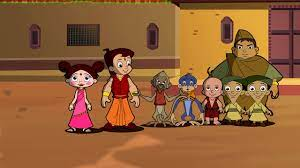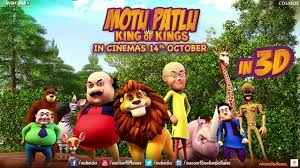
* <h4 style="text-align: left;color:purple; ">raúl campos, jan suter, marcus raboy and Jay Karas have directed and released sevaral  stand-up comedy shows on netflix thier are 48 stand up comedy show between this directors with so many popualr faces.</h4>

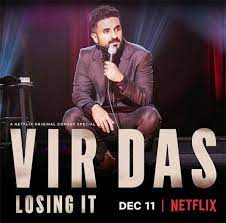

* <h4 style="text-align: left;color:purple; ">other directores in top 15  are  movie directers  with different films under their belt</h4>

  <h1 style="text-align: left;color:darkblue; ">2.8) Rating Analysis
     <a id="2.1"></a>

<span style="font-family:Ostwald;background-color:darkblue;text-align: left;color:white;padding: 10px;font-size: 24px; margin: 4px 2px;border-radius: 15px;"> Which rating category has most amount of movis and tv shows ?</span>

In [41]:
fig = px.histogram(data_frame=data, x= 'rating',color ='Type',height= 500,template='plotly_dark',color_discrete_sequence=['#f47c64','darkcyan'])
fig.update_xaxes(categoryarray=['G','TV-G','TV-Y','PG','TV-PG','TV-Y7','TV-Y7-FV','PG-13','TV-14','NC-17','NR','R','TV-MA','UR'])
fig.update_traces( marker_line_color='black',
                  marker_line_width=2.5, opacity=0.9)
#ig.add_vline(x= 2.4,line_dash= 'dot')
fig.add_vrect(x0=-0.4,x1=2.4, line_width=0,fillcolor="grey", opacity=0.1,annotation_text="Little Kids",
              annotation_position="top",annotation=dict(font_size=20, font_family="Times New Roman",bgcolor= 'black'))
fig.add_vrect(x0=2.4,x1=5.4, line_width=0, fillcolor="dimgrey", opacity=0.3,annotation_text="Older Kids",
              annotation_position="top",annotation=dict(font_size=20, font_family="Times New Roman",bgcolor= 'black'))
fig.add_vrect(x0=5.4,x1=8.4, line_width=0, fillcolor="darkgrey", opacity=0.3,annotation_text="Teenagers",
              annotation_position="top",annotation=dict(font_size=20, font_family="Times New Roman",bgcolor= 'black'))
fig.add_vrect(x0=8.4,x1=13.4, line_width=0, fillcolor="white", opacity=0.3,annotation_text="Adults",
              annotation_position="top",annotation=dict(font_size=20, font_family="Times New Roman",bgcolor= 'black'))
fig.update_xaxes(tickcolor='salmon', ticklen=10,ticks="outside", tickwidth=2,)
fig.show()

 <h4 style="text-align: left;color:purple; "><b>Observation</b></h4>
 
* <h4 style="text-align: left;color:purple; ">netfix has more content for adults and teenagers compared to kids 

  <h1 style="text-align: left;color:darkblue; ">2.9) Countrywise analysis
     <a id="2.9"></a>

In [42]:
def country_wise_count(df):
    temp_df = df['country'].value_counts().reset_index()
    temp_df.rename(columns= {'index':'country','country':'movies_count'},inplace=True)
    return temp_df

In [43]:
top10_country_movies=movies['country'].value_counts(ascending=True).reset_index().tail(10)
top10_country_movies.rename(columns= {'index':'country','country':'movies_count'},inplace=True)
#top10_country_movies

In [44]:
country_wise_movies= country_wise_count(movies)
country_wise_movies
fig1= go.Figure(go.Table( columnorder = [1,2,3],
      columnwidth = [30,20],
        header=dict(values=['<b>country<b>','<b>movies<b>'],
                    line_color='black',font=dict(color='black',size= 15),height=40,
                    fill_color='#f47c64',
                    align=['left','center']),
            cells=dict(values=[country_wise_movies.country,country_wise_movies.movies_count],
                   fill_color='#ffdac4',line_color='grey',
                       font=dict(color='black', family="Lato", size=15),
                   align='left')))

fig1.update_layout( width= 700,height=500,title_x=0.45,font_color='white',
                  title ={'text': "<b style:'color:blue;'>all countries with movie count</b>", 'font': {'size': 30}},
                   title_font_family="Times New Roman",margin=dict(l=130, r= 200, t=70, b=30),
                  paper_bgcolor='black')
#fig1.show()
fig = px.bar(data_frame=top10_country_movies,x= 'movies_count', y = 'country', orientation='h',template='plotly_dark',height = 500,width =800,
             #color = top_15_genres.index,
             color_discrete_sequence=["#f47c64"])
fig.update_traces( marker_line_color='darkorange',
                  marker_line_width=2.5, opacity=1.0)
fig.update_xaxes(showgrid=False)
fig.update_traces(showlegend=False)
fig.update_yaxes(tickcolor='grey', ticklen=10,ticks="outside", tickwidth=2)
fig.update_layout( margin=dict(l=0, r=0, t=70, b=80),
    autosize=True,width= 700,
    title ={'text': "<b style:'color:blue;'>Top 10 countries with movie count</b>", 'font': {'size': 30}},title_x=0.18,
    
     title_font_family="Times New Roman",
    title_font_color="white",
    font_color='white',
    
xaxis_title={'text': "<b style:'color:blue;'>Movies</b>", 'font': {'size':16},'standoff':20},
yaxis_title={'text': "<b style:'color:blue';></b>", 'font': {'size': 15}}, 
   #paper_bgcolor='black',
    plot_bgcolor='rgba(0,0,0,0)')

#fig1.update_layout( width= 200,height=400,title = 'USA')
#ig.update_layout(width 
fig.show()
fig1.show()

In [45]:
top10_country_tv_shows=tv_show['country'].value_counts(ascending=True).reset_index().tail(10)
top10_country_tv_shows.rename(columns= {'index':'country','country':'tvshow_count'},inplace=True)
#top10_country_tv_shows

In [46]:
country_wise_tvshows= country_wise_count(tv_show)
country_wise_tvshows
fig1= go.Figure(go.Table( columnorder = [1,2,3],
      columnwidth = [30,20],
        header=dict(values=['<b>country<b>','<b>TV shows<b>'],
                    line_color='black',font=dict(color='black',size= 15),height=40,
                    fill_color='cyan',
                    align=['left','center']),
            cells=dict(values=[country_wise_tvshows.country,country_wise_tvshows.movies_count],
                   fill_color='lightcyan',line_color='grey',
                       font=dict(color='black', family="Lato", size=15),
                   align='left')))
fig1.update_layout( width= 700,height=500,title_x=0.35,font_color='white',
                  title ={'text': "<b style:'color:blue;'>all countries with TV shows count</b>", 'font': {'size': 30}},
                   title_font_family="Times New Roman",margin=dict(l=70, r= 300, t=70, b=30),
                  paper_bgcolor='black')
#fig1.update_layout( width= 500,height=500,title = 'USA')

fig = px.bar(data_frame=top10_country_tv_shows,x= 'tvshow_count', y = 'country', orientation='h',template='plotly_dark',height = 500,width =800,
             #color = top_15_genres.index,
             color_discrete_sequence=["darkcyan"])
fig.update_traces( marker_line_color='aqua',
                  marker_line_width=2.5, opacity=1.0)
fig.update_layout( margin=dict(l=0, r=0, t=70, b=80), width= 700,
    autosize=True,
    title ={'text': "<b style:'color:blue;'>Top 10 countries with TV shows count</b>", 'font': {'size': 30}},title_x=0.19,
    
     title_font_family="Times New Roman",
    title_font_color="white",
    font_color='white',
    
xaxis_title={'text': "<b style:'color:blue;'>TV shows</b>", 'font': {'size':16},'standoff':20},
yaxis_title={'text': "<b style:'color:blue';></b>", 'font': {'size': 15}}, 
   # paper_bgcolor='black',
    plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(showgrid=False)
fig.update_traces(showlegend=False)
fig.update_yaxes(tickcolor='grey', ticklen=10,ticks="outside", tickwidth=2)
fig.show()
fig1.show()

 <h4 style="text-align: left;color:purple; "><b>Observation</b></h4>
 
* <h4 style="text-align: left;color:purple; ">USA and India had the most number of movies on netflix other countries are far behind compared to this countries

* <h4 style="text-align: left;color:purple; ">for tv shows USA is at top with 754 tv shows countries like UK ,japan and soutn korea are not far behind this countries also has more than 150 tv shows

 <h2 style="text-align: left;color:darkblue; ">let's look at America and India more closely

In [47]:
def country_table(country:str,content_type='movie' ):
    if content_type== 'movie':
        sort_country = movies[movies['country']== country]
        table= sort_country[['title','release_year']].sort_values(by='release_year',ascending=False).reset_index(drop=True)
        return table
    if content_type == 'TV':
        sort_country= tv_show[tv_show['country']== country]
        table = sort_country[['title','release_year']].sort_values(by='release_year',ascending=False).reset_index(drop=True)
        
        return table

In [48]:
USA_movies = country_table('United States')
USA_TVshow= country_table('United States',content_type='TV')


Indian_movies = country_table('India')
Indian_TVshow =country_table('India',content_type='TV')

In [49]:
def plot_table(movie_table,tv_table, title:str):
    from plotly.subplots import make_subplots
    fig = make_subplots(
        rows=1, cols=2,
        shared_xaxes=True,
        vertical_spacing=0.01,horizontal_spacing=0.03,
        specs=[[{"type": "table"},{"type": "table"}]]

    )

    fig.add_trace(go.Table( columnorder = [1,2,3],
      columnwidth = [30,100],
        header=dict(values=['<b>Release Year<b>','<b>Movies<b>'],
                    line_color='black',
                    fill_color='#DA1884',font=dict(color='white',size= 15),
        height=40,
                    align=['left','center']),
            cells=dict(values=[movie_table.release_year,movie_table.title],
                   fill_color=['pink'],line_color='grey',font=dict(color='black', family="Lato", size=15),
                   align='left')),row=1,col=1
    )
    fig.add_trace(go.Table( columnorder = [1,2,3],
      columnwidth = [30,100],
        header=dict(values=['<b>Release Year<b>','<b>TV Shows<b>'],
                    line_color='black',font=dict(color='#000080',size= 15),height=40,
                    fill_color='orange',
                    align=['left','center']),
            cells=dict(values=[tv_table.release_year,tv_table.title],
                   fill_color='#ffdac4',line_color='grey',
                       font=dict(color='black', family="Lato", size=15),
                   align='left')),row=1,col=2
    )
    fig.update_layout( width=700,height=510,margin=dict(l=50, r=30, t=70, b=40)  ,
                      title ={'text': "<b style:'color:blue;'>{0} Movies and TV Shows </b>".format(title), 'font': {'size': 30}},title_x=0.5,
    
     title_font_family="Times New Roman",
    title_font_color="black")
    return fig.show()

<span style="font-family:Ostwald;background-color:darkblue;text-align: left;color:white;padding: 10px;font-size: 22px; margin: 4px 2px;border-radius: 15px;">What are the indian movies and tv shows released on netflix yearwise ?

In [50]:
plot_table(Indian_movies,Indian_TVshow,'Indian')
#plot_table(USA_movies,USA_TVshow,"USA")

<span style="font-family:Ostwald;background-color:darkblue;text-align: left;color:white;padding: 10px;font-size: 24px; margin: 4px 2px;border-radius: 15px;">What are top directors from india ?

In [51]:

India = data[data['country'] == 'India']
India

Indian_directors =India['director'].value_counts(ascending=True).tail(16)[:-1]
#Indian_director
fig = px.bar(y=Indian_directors.index,x=Indian_directors.values,orientation='h',template='plotly_dark',
            color_discrete_sequence=['salmon'] ,width=700)
#fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_layout( margin=dict(l=0, r=0, t=70, b=80), width= 700,
    autosize=True,
    title ={'text': "<b style:'color:blue;'>Top 15 directors from India</b>", 'font': {'size': 30}},title_x=0.21,
    
     title_font_family="Times New Roman",
    title_font_color="white",
    font_color='white',
    
xaxis_title={'text': "<b style:'color:blue;'>movie count</b>", 'font': {'size':16},'standoff':20},
yaxis_title={'text': "<b style:'color:blue';></b>", 'font': {'size': 15}}, 
   # paper_bgcolor='black',
    plot_bgcolor='rgba(0,0,0,0)')
fig.show()

<span style="font-family:Ostwald;background-color:darkblue;text-align: left;color:white;padding: 10px;font-size: 22px; margin: 4px 2px;border-radius: 15px;">What are the american movies and tv shows released on netflix yearwise ?

In [52]:
plot_table(USA_movies,USA_TVshow,'American')

<span style="font-family:Ostwald;background-color:darkblue;text-align: left;color:white;padding: 10px;font-size: 24px; margin: 4px 2px;border-radius: 15px;">What are top directers from america ?

In [53]:
USA = data[data['country'] == 'United States']
USA

USA_directors =USA['director'].value_counts(ascending=True).tail(16)[:-1]
#USA_director
fig = px.bar(y=USA_directors.index,x=USA_directors.values,orientation='h',template='plotly_dark',
            color_discrete_sequence=['darksalmon'] ,width=700)
#fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_layout( margin=dict(l=0, r=0, t=70, b=80), width= 700,
    autosize=True,
    title ={'text': "<b style:'color:blue;'>Top 15 directors from America</b>", 'font': {'size': 30}},title_x=0.21,
    
     title_font_family="Times New Roman",
    title_font_color="white",
    font_color='white',
    
xaxis_title={'text': "<b style:'color:blue;'>movie count</b>", 'font': {'size':16},'standoff':20},
yaxis_title={'text': "<b style:'color:blue';></b>", 'font': {'size': 15}}, 
   # paper_bgcolor='black',
    plot_bgcolor='rgba(0,0,0,0)')
fig.show()

<h1 style="text-align: center;color:white;background-color:darkblue;">  Please Upvote 👍 If You Liked this Notbook</h1>
